In [13]:
from langgraph.graph import StateGraph, START, END

In [14]:
from langchain_groq import ChatGroq
from typing import TypedDict
from langchain_core.output_parsers import StrOutputParser
from dotenv import load_dotenv
from langchain_core.prompts import PromptTemplate
load_dotenv()


True

In [15]:
model = ChatGroq(model="llama-3.3-70b-versatile")

In [16]:
outline_prompt = PromptTemplate(
    template=""" You are healpful ai assistant that generate detaild outline for any topic.
    So create one detailed outline for {topic}
""",
input_variables=['topic']
)

In [17]:
class PromptState(TypedDict):

    topic : str
    outline : str
    blog : str

In [ ]:
def create_outline(state: PromptState) -> PromptState:
    """Generate an outline for the given topic using the LLM."""
    topic = state['topic']
    
    formatted_prompt = outline_prompt.format(topic=topic)
    result = model.invoke(formatted_prompt)
    
    state['outline'] = result.content
    
    return state

In [19]:
blog_prompt = PromptTemplate(
    template="""
create a detailed Blog using  given topic and its outline {outline} \n
""",
input_variables=['outline']
)

In [ ]:
def create_blog(state: PromptState) -> PromptState:
    """Generate a detailed blog using the outline from the previous step."""
    outline = state['outline']
    
    formatted_prompt = blog_prompt.format(outline=outline)
    result = model.invoke(formatted_prompt)
    
    
    state['blog'] = result.content
    
    return state

In [21]:
graph = StateGraph(PromptState)

graph.add_node("create_outline",create_outline)
graph.add_node("create_blog",create_blog)

graph.add_edge(START,'create_outline')
graph.add_edge('create_outline','create_blog')
graph.add_edge('create_blog', END)

flow = graph.compile()

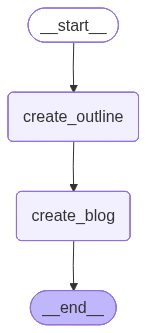

In [22]:
graph.compile()

In [23]:
flow.invoke({'topic':"India become super power"})

{'topic': 'India become super power',
 'outline': 'Here is a detailed outline on the topic "India Becoming a Superpower":\n\n**I. Introduction**\n\n* Definition of a superpower: A nation that has significant influence and dominance in global affairs, economics, politics, and military\n* India\'s potential to become a superpower: With a large and growing economy, a significant military, and a diverse and skilled population\n* Thesis statement: India has the potential to become a superpower in the near future, but it will require significant efforts and reforms in various sectors.\n\n**II. Economic Growth and Development**\n\n* Overview of India\'s economy: Currently the 5th largest economy in the world, with a growth rate of 7-8% per annum\n* Key sectors driving economic growth: IT, manufacturing, services, and agriculture\n* Challenges to economic growth: Corruption, infrastructure, and regulatory framework\n* Strategies for economic growth:\n\t+ Increasing foreign investment\n\t+ Prom